<a href="https://colab.research.google.com/github/OksanaKorniichuk/Python-projects/blob/main/Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")
#changing work folder
%cd /content/drive/MyDrive/Files for downloading

# Uploading dataset
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")
countries = pd.read_csv("countries.csv")
print(f"Events\n {events.head()}")
print(f"Products\n {products.head()}")
print(f"Countries\n {countries.head()}")

Mounted at /content/drive
/content/drive/MyDrive/Files for downloading
Events
     Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79  
Products
      id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Bev

In [ ]:
print(f"Events\n")
events.info()
print(f"\nProducts\n")
products.info()
print(f"\nCountries\n")
countries.info()

Events

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB

Products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int6

In [ ]:
# % пропущених значень
print(f"Events\n {events.isna().sum() / events.shape[0] * 100}\n")
print(f"Products\n {products.isna().sum() / products.shape[0] * 100}\n")
print(f"Countries\n {countries.isna().sum() / countries.shape[0] * 100}")

Events
 Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64

Products
 id           0.0
item_type    0.0
dtype: float64

Countries
 name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
# delete rows that contain gaps in specific columns
events = events.dropna(subset="Units Sold")


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1328 non-null   int64  
 1   Order Date      1328 non-null   object 
 2   Ship Date       1328 non-null   object 
 3   Order Priority  1328 non-null   object 
 4   Country Code    1246 non-null   object 
 5   Product ID      1328 non-null   int64  
 6   Sales Channel   1328 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1328 non-null   float64
 9   Unit Cost       1328 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 114.1+ KB


In [ ]:
events = events.fillna('Unknown')

In [ ]:
print(f"Events\n {events.isna().sum() / events.shape[0] * 100}\n")

Events
 Order ID          0.0
Order Date        0.0
Ship Date         0.0
Order Priority    0.0
Country Code      0.0
Product ID        0.0
Sales Channel     0.0
Units Sold        0.0
Unit Price        0.0
Unit Cost         0.0
dtype: float64



Рядки з пропущеними значеннями у колонці Units Sold видалено, оскільки їхня частка становить всього 0.150376%.

Пропущені значення у колонці Country Code заповнено 'Unknown', оскільки їхня частка (6.165414%) завелика, щоб можна було видалити дані рядки. При розрахунку загальних продажів ці дані можна використати, а при обчисленні продажів за країнами чи регіонами - виключити.

Рядок з пропущеними значеннями у таблиці Countries не видалено, оскільки це довідкова інформація.

Перетворимо тип колонок Order Date та Ship Date.

In [ ]:
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


In [ ]:
#checking for duplicates in data
print(f"Events\n{events.duplicated().sum()}\n")
print(f"Products\n{products.duplicated().sum()}\n")
print(f"Countries\n{countries.duplicated().sum()}\n")

Events
0

Products
0

Countries
0



Дублікатів у жодній таблиці нема.

In [ ]:
events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198996,217.386320,176.187801


Аномалій не виявлено.

З'єднаємо три таблиці в одну.

In [ ]:
# Performing an left join
data = pd.merge(events, products, left_on='Product ID', right_on='id', how="left")
data

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,2103,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,2103,Cereal
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,7940,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,2455,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,1270,Beverages
...,...,...,...,...,...,...,...,...,...,...,...,...
1323,994504153,2017-01-10,2017-01-13,M,SWE,4594,Online,4734.0,9.33,6.92,4594,Fruits
1324,994978797,2014-12-05,2015-01-02,H,ITA,1270,Offline,5192.0,47.45,31.79,1270,Beverages
1325,996754205,2010-09-20,2010-09-22,L,RUS,7331,Offline,574.0,255.28,159.42,7331,Baby Food
1326,998043382,2010-06-15,2010-07-03,H,MLT,8293,Online,2070.0,437.20,263.33,8293,Cosmetics


In [ ]:
data = pd.merge(data, countries, left_on='Country Code', right_on='alpha-3', how="left")
data

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,7940,Household,NaN,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,994504153,2017-01-10,2017-01-13,M,SWE,4594,Online,4734.0,9.33,6.92,4594,Fruits,Sweden,SE,SWE,Europe,Northern Europe
1324,994978797,2014-12-05,2015-01-02,H,ITA,1270,Offline,5192.0,47.45,31.79,1270,Beverages,Italy,IT,ITA,Europe,Southern Europe
1325,996754205,2010-09-20,2010-09-22,L,RUS,7331,Offline,574.0,255.28,159.42,7331,Baby Food,Russia,RU,RUS,Europe,Eastern Europe
1326,998043382,2010-06-15,2010-07-03,H,MLT,8293,Online,2070.0,437.20,263.33,8293,Cosmetics,Malta,MT,MLT,Europe,Southern Europe


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
 10  id              1328 non-null   int64         
 11  item_type       1328 non-null   object        
 12  name            1246 non-null   object        
 13  alpha-2         1246 non-null   object        
 14  alpha-3         1246 non-null   object        
 15  regi

In [ ]:
data = data.fillna('Unknown')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
 10  id              1328 non-null   int64         
 11  item_type       1328 non-null   object        
 12  name            1328 non-null   object        
 13  alpha-2         1328 non-null   object        
 14  alpha-3         1328 non-null   object        
 15  regi

Видалимо непотрібні колонки та перейменуємо додані.

In [ ]:
data.drop(['id', 'alpha-3'], axis=1, inplace=True)

In [ ]:
data.rename(columns={'item_type': 'Product Category', 'name': 'Country'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          1328 non-null   int64         
 1   Order Date        1328 non-null   datetime64[ns]
 2   Ship Date         1328 non-null   datetime64[ns]
 3   Order Priority    1328 non-null   object        
 4   Country Code      1328 non-null   object        
 5   Product ID        1328 non-null   int64         
 6   Sales Channel     1328 non-null   object        
 7   Units Sold        1328 non-null   float64       
 8   Unit Price        1328 non-null   float64       
 9   Unit Cost         1328 non-null   float64       
 10  Product Category  1328 non-null   object        
 11  Country           1328 non-null   object        
 12  alpha-2           1328 non-null   object        
 13  region            1328 non-null   object        
 14  sub-region        1328 n

Розрахуємо ключові метрики діяльності компанії.

In [ ]:
data['Revenue'] = data['Units Sold'] * data['Unit Price']
data['Cost'] = data['Units Sold'] * data['Unit Cost']
data['Profit'] = data['Revenue'] - data['Cost']
data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Product Category,Country,alpha-2,region,sub-region,Revenue,Cost,Profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown,Unknown,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe,362897.60,243129.92,119767.68


In [ ]:
total_number_of_orders = data['Order ID'].count()
print(f"Total number of orders: {total_number_of_orders}")
total_revenue = data['Revenue'].sum()
print(f"Total revenue: {total_revenue}")
total_cost = data['Cost'].sum()
print(f"Total cost: {total_cost}")
total_profit = data['Profit'].sum()
print(f"Total profit: {total_profit}")
number_of_covered_countries = data['Country'].nunique() - 1
print(f"Number of covered countries: {number_of_covered_countries}")

Total number of orders: 1328
Total revenue: 1702129408.21
Total cost: 1200694949.21
Total profit: 501434459.0
Number of covered countries: 45


Проаналізуємо продажі у розрізі категорій товарів.

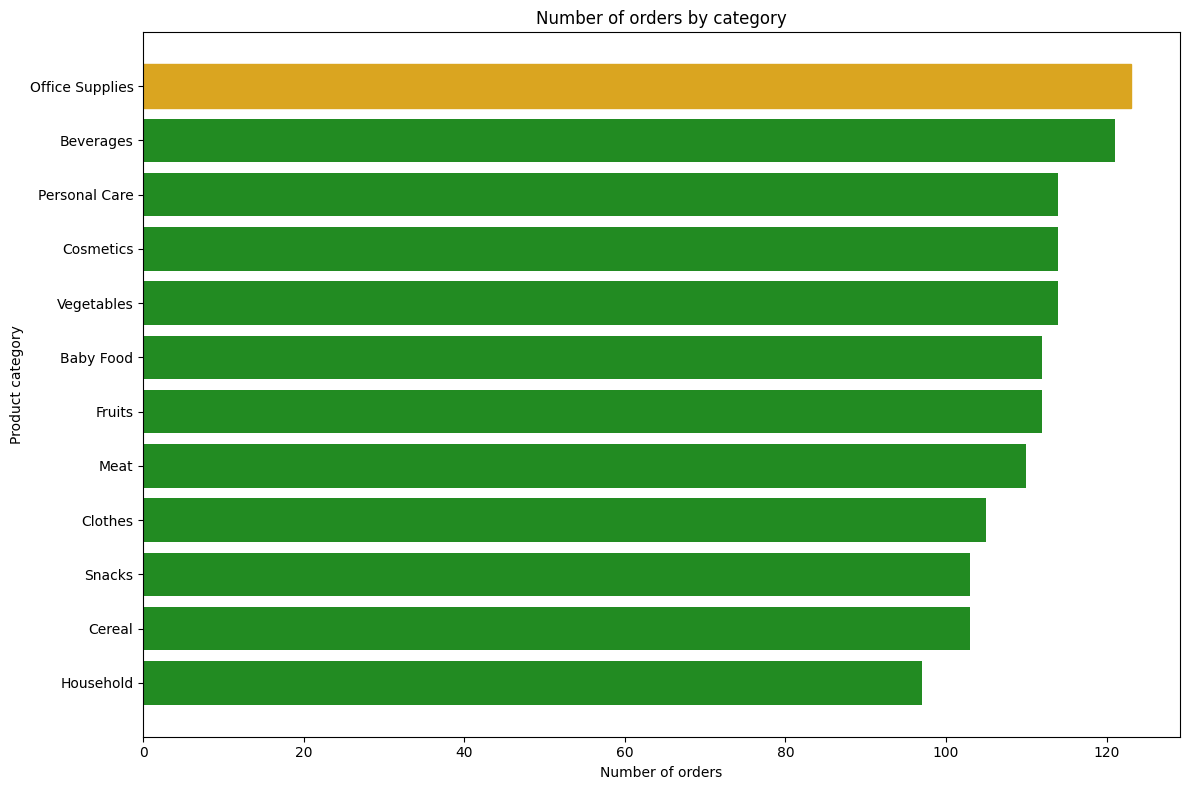

In [ ]:
number_of_orders_by_category = data['Product Category'].value_counts().sort_values()
# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(number_of_orders_by_category.index, number_of_orders_by_category.values, color="forestgreen")
bars[-1].set_color('goldenrod')
plt.title("Number of orders by category")
plt.xlabel("Number of orders")
plt.ylabel("Product category")
plt.tight_layout()
#plt.grid(True)
# Show the graph
plt.show()

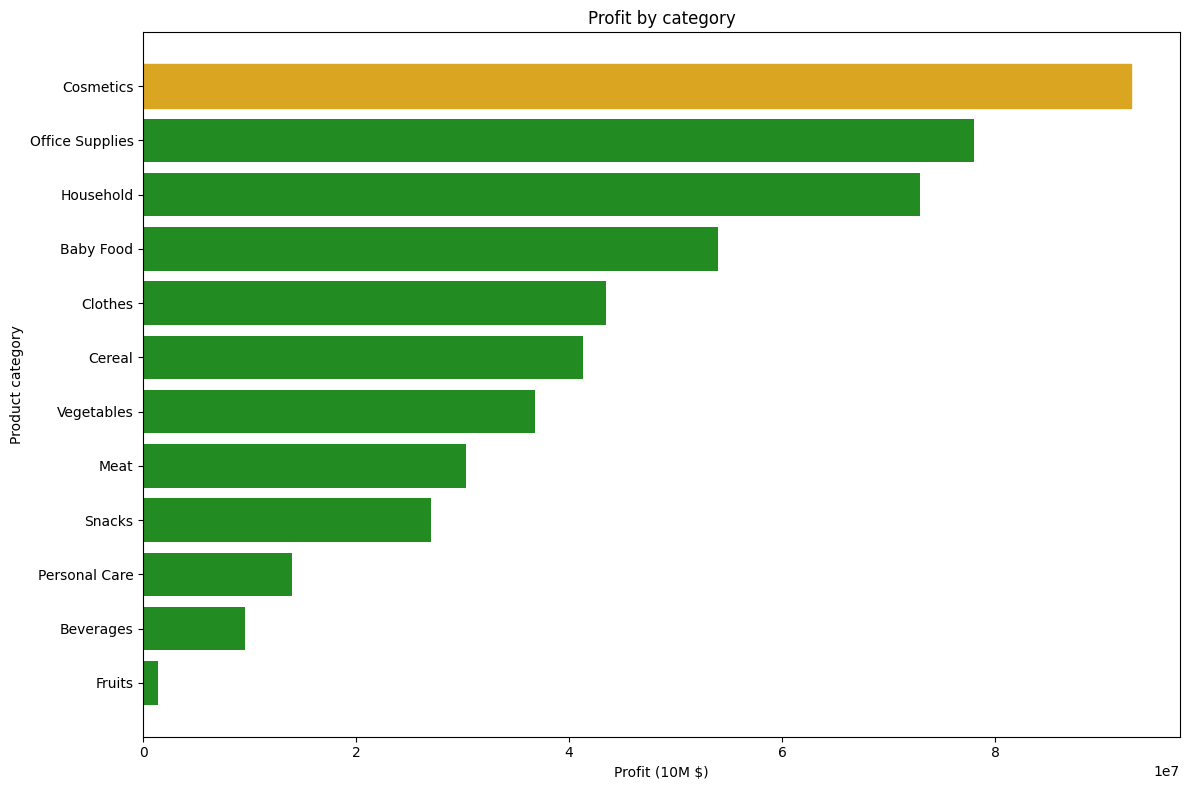

In [ ]:
profit_by_category = data.groupby('Product Category')['Profit'].sum().sort_values()
# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(profit_by_category.index, profit_by_category.values, color="forestgreen")
bars[-1].set_color('goldenrod')
plt.title("Profit by category")
plt.xlabel("Profit (10M $)")
plt.ylabel("Product category")
plt.tight_layout()
#plt.grid(True)
# Show the graph
plt.show()

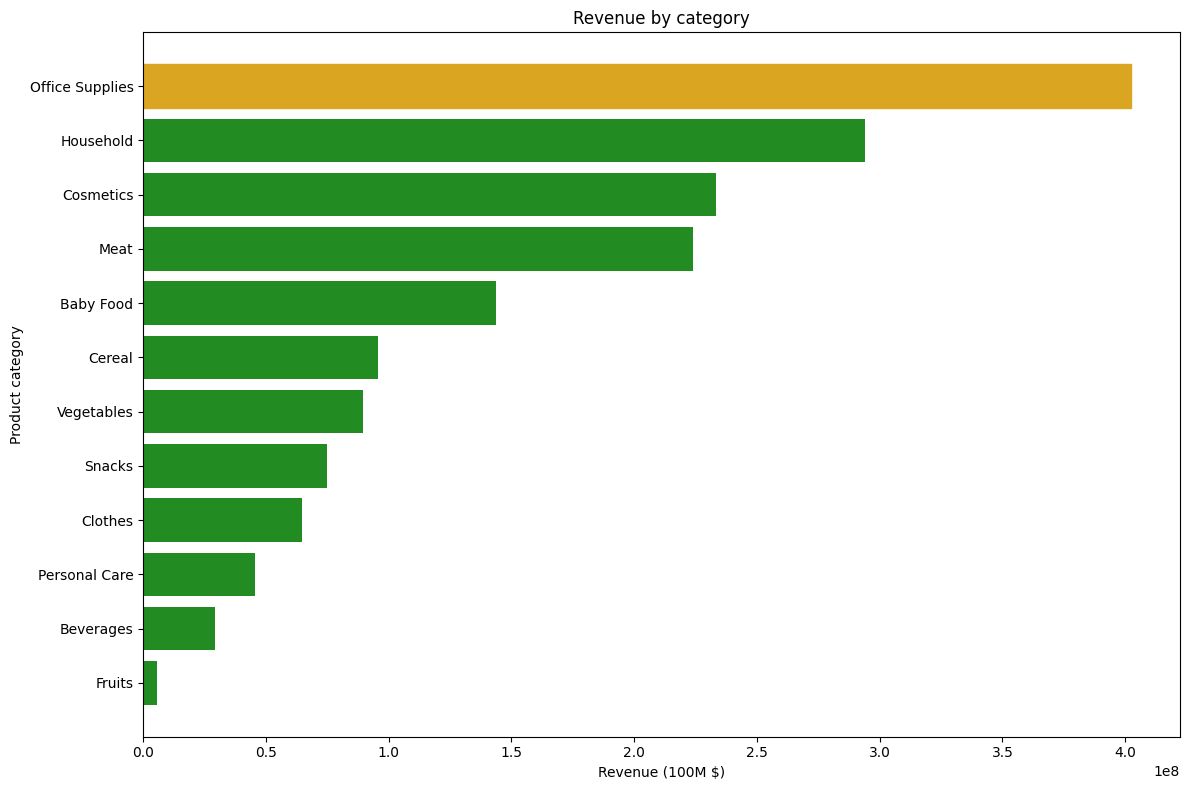

In [ ]:
revenue_by_category = data.groupby('Product Category')['Revenue'].sum().sort_values()
# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(revenue_by_category.index, revenue_by_category.values, color="forestgreen")
bars[-1].set_color('goldenrod')
plt.title("Revenue by category")
plt.xlabel("Revenue (100M $)")
plt.ylabel("Product category")
plt.tight_layout()
#plt.grid(True)
# Show the graph
plt.show()

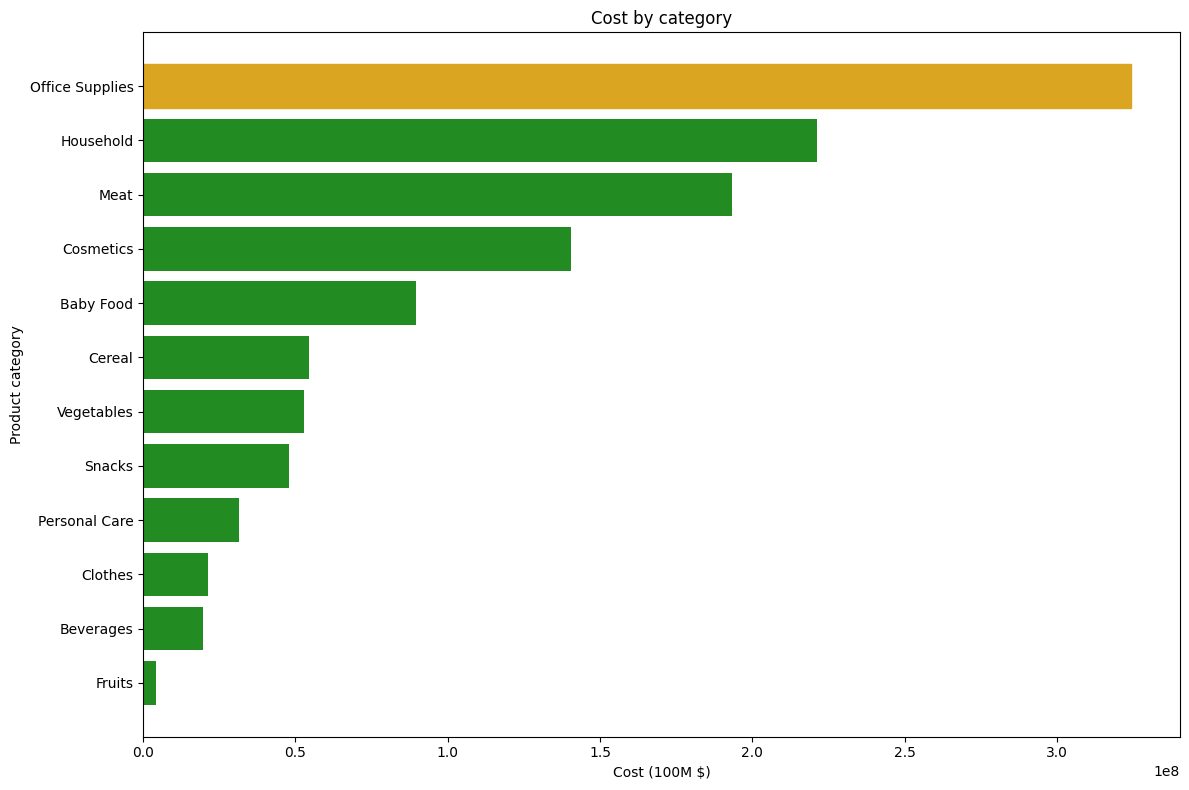

In [ ]:
cost_by_category = data.groupby('Product Category')['Cost'].sum().sort_values()
# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(cost_by_category.index, cost_by_category.values, color="forestgreen")
bars[-1].set_color('goldenrod')
plt.title("Cost by category")
plt.xlabel("Cost (100M $)")
plt.ylabel("Product category")
plt.tight_layout()
#plt.grid(True)
# Show the graph
plt.show()

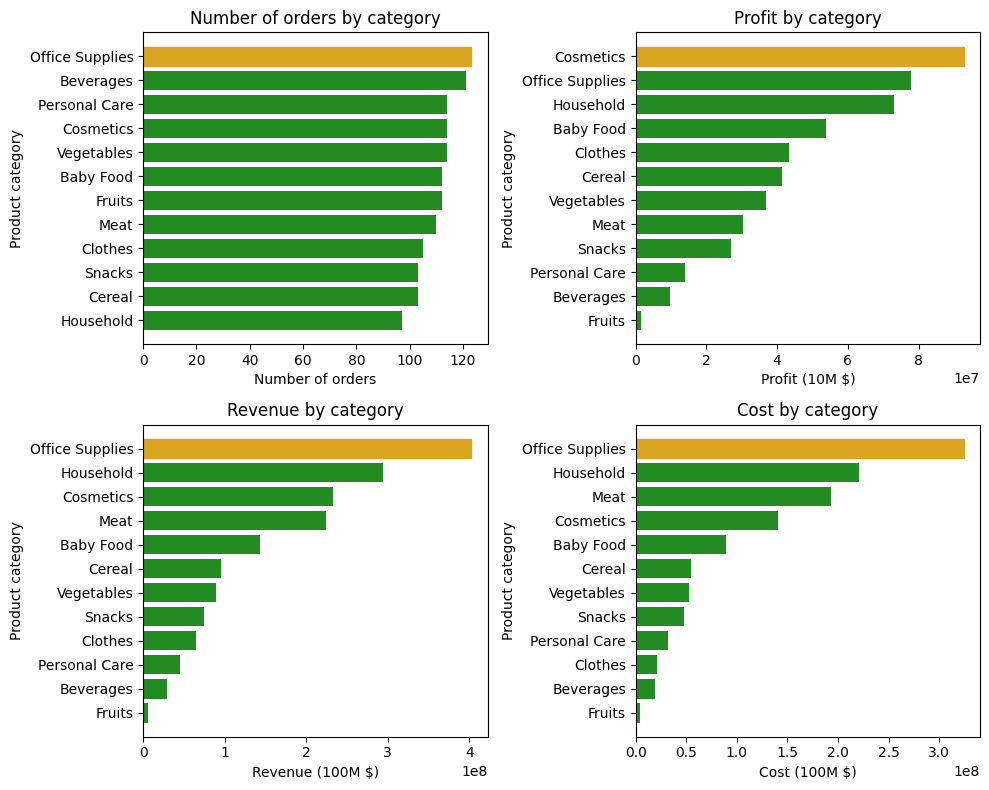

In [ ]:
# Create a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# First subplot
bars = ax[0, 0].barh(number_of_orders_by_category.index, number_of_orders_by_category.values, color="forestgreen")
bars[-1].set_color('goldenrod')
ax[0, 0].set_title("Number of orders by category")  # Title of the subplot
ax[0, 0].set_xlabel("Number of orders")  # X-axis label
ax[0, 0].set_ylabel("Product category")  # Y-axis label

# Second subplot
bars = ax[0, 1].barh(profit_by_category.index, profit_by_category.values, color="forestgreen")
bars[-1].set_color('goldenrod')
ax[0, 1].set_title("Profit by category")  # Title of the subplot
ax[0, 1].set_xlabel("Profit (10M $)")  # X-axis label
ax[0, 1].set_ylabel("Product category")  # Y-axis label

# Third subplot
bars = ax[1, 0].barh(revenue_by_category.index, revenue_by_category.values, color="forestgreen")
bars[-1].set_color('goldenrod')
ax[1, 0].set_title("Revenue by category")  # Title of the subplot
ax[1, 0].set_xlabel("Revenue (100M $)")  # X-axis label
ax[1, 0].set_ylabel("Product category")  # Y-axis label

# Fourth subplot
bars = ax[1, 1].barh(cost_by_category.index, cost_by_category.values, color="forestgreen")
bars[-1].set_color('goldenrod')
ax[1, 1].set_title("Cost by category")  # Title of the subplot
ax[1, 1].set_xlabel("Cost (100M $)")  # X-axis label
ax[1, 1].set_ylabel("Product category")  # Y-axis label

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [ ]:
print(f"Share of {number_of_orders_by_category.index[-1]} category in total number of orders: {number_of_orders_by_category.values[-1]/total_number_of_orders *100}%")
print(f"Share of {number_of_orders_by_category.index[0]} category in total number of orders: {number_of_orders_by_category.values[0]/total_number_of_orders *100}%")

Share of Office Supplies category in total number of orders: 9.262048192771084%
Share of Household category in total number of orders: 7.30421686746988%


In [ ]:
print(f"Share of {profit_by_category.index[-1]} category in total profit: {profit_by_category.values[-1]/total_profit *100}%")
print(f"Share of {profit_by_category.index[0]} category in total profit: {profit_by_category.values[0]/total_profit *100}%")

Share of Cosmetics category in total profit: 18.4916103203031%
Share of Fruits category in total profit: 0.2843700695886958%


Проаналізуємо продажі за каналами продажу.

In [ ]:
data["Sales Channel"] = data["Sales Channel"].str.replace("o", "O")

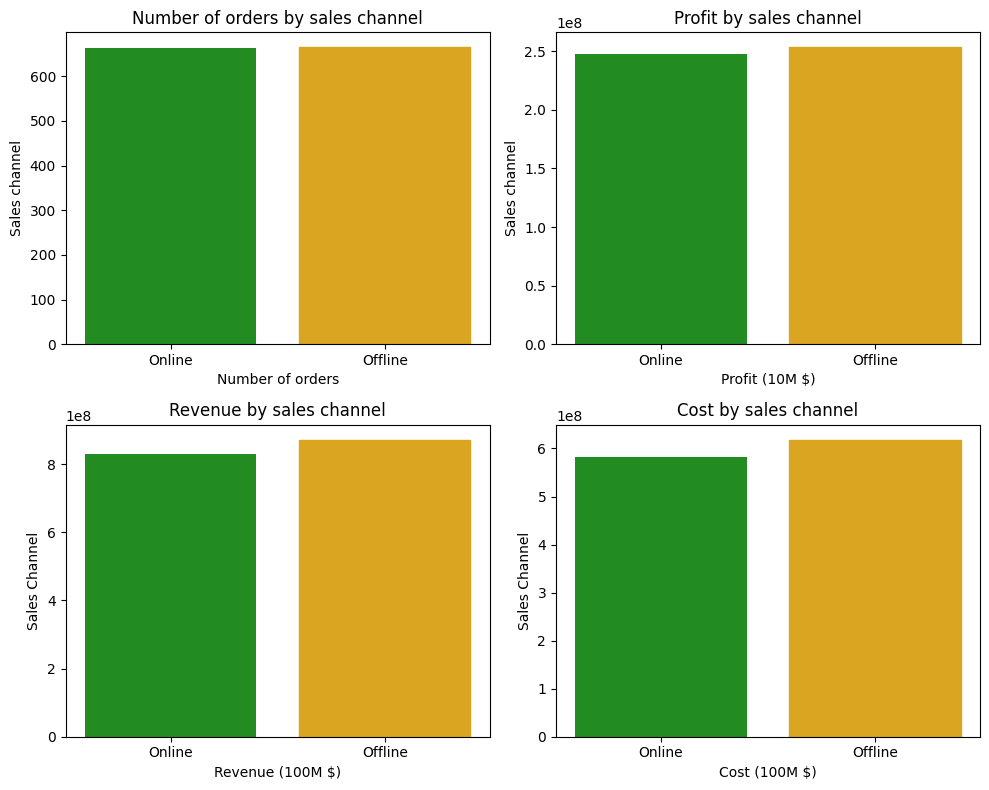

In [ ]:
# Create a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# First subplot
number_of_orders_by_sales_channel = data['Sales Channel'].value_counts().sort_values()
bars = ax[0, 0].bar(number_of_orders_by_sales_channel.index, number_of_orders_by_sales_channel.values, color="forestgreen")
bars[-1].set_color('goldenrod')
ax[0, 0].set_title("Number of orders by sales channel")  # Title of the subplot
ax[0, 0].set_xlabel("Number of orders")  # X-axis label
ax[0, 0].set_ylabel("Sales channel")  # Y-axis label

# Second subplot
profit_by_sales_channel = data.groupby('Sales Channel')['Profit'].sum().sort_values()
bars = ax[0, 1].bar(profit_by_sales_channel.index, profit_by_sales_channel.values, color="forestgreen")
bars[-1].set_color('goldenrod')
ax[0, 1].set_title("Profit by sales channel")  # Title of the subplot
ax[0, 1].set_xlabel("Profit (10M $)")  # X-axis label
ax[0, 1].set_ylabel("Sales channel")  # Y-axis label

# Third subplot
revenue_by_sales_channel = data.groupby('Sales Channel')['Revenue'].sum().sort_values()
bars = ax[1, 0].bar(revenue_by_sales_channel.index, revenue_by_sales_channel.values, color="forestgreen")
bars[-1].set_color('goldenrod')
ax[1, 0].set_title("Revenue by sales channel")  # Title of the subplot
ax[1, 0].set_xlabel("Revenue (100M $)")  # X-axis label
ax[1, 0].set_ylabel("Sales Channel")  # Y-axis label

# Fourth subplot
cost_by_sales_channel = data.groupby('Sales Channel')['Cost'].sum().sort_values()
bars = ax[1, 1].bar(cost_by_sales_channel.index, cost_by_sales_channel.values, color="forestgreen")
bars[-1].set_color('goldenrod')
ax[1, 1].set_title("Cost by sales channel")  # Title of the subplot
ax[1, 1].set_xlabel("Cost (100M $)")  # X-axis label
ax[1, 1].set_ylabel("Sales Channel")  # Y-axis label

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [ ]:
number_of_orders_by_sales_channel

,count
Sales Channel,
Online,663
Offline,665


In [ ]:
revenue_by_sales_channel

,Revenue
Sales Channel,
Online,8.303688e+08
Offline,8.717606e+08


In [ ]:
print(f"Difference between cost by sales channel: {(cost_by_sales_channel.values[-1] - cost_by_sales_channel.values[0])/1000000} M$")
print(f"Difference between profit by sales channel: {(profit_by_sales_channel.values[-1] - profit_by_sales_channel.values[0])/1000000} M$")

Difference between revenue by sales channel: 41.39183954999995 M$
Difference between cost by sales channel: 35.89326093000007 M$
Difference between profit by sales channel: 5.498578620000004 M$


Проаналізуємо продажі за країнами та регіонами. Для цього обиратимемо топ 10 країн за досліджуваним показником.

In [ ]:
top_countries_by_profit = data[data['Country'] != 'Unknown'].groupby("Country")['Profit'].sum().nlargest(10)
top_regions_by_profit = data[data['Country'] != 'Unknown'].groupby("region")["Profit"].sum().sort_values(ascending=False)


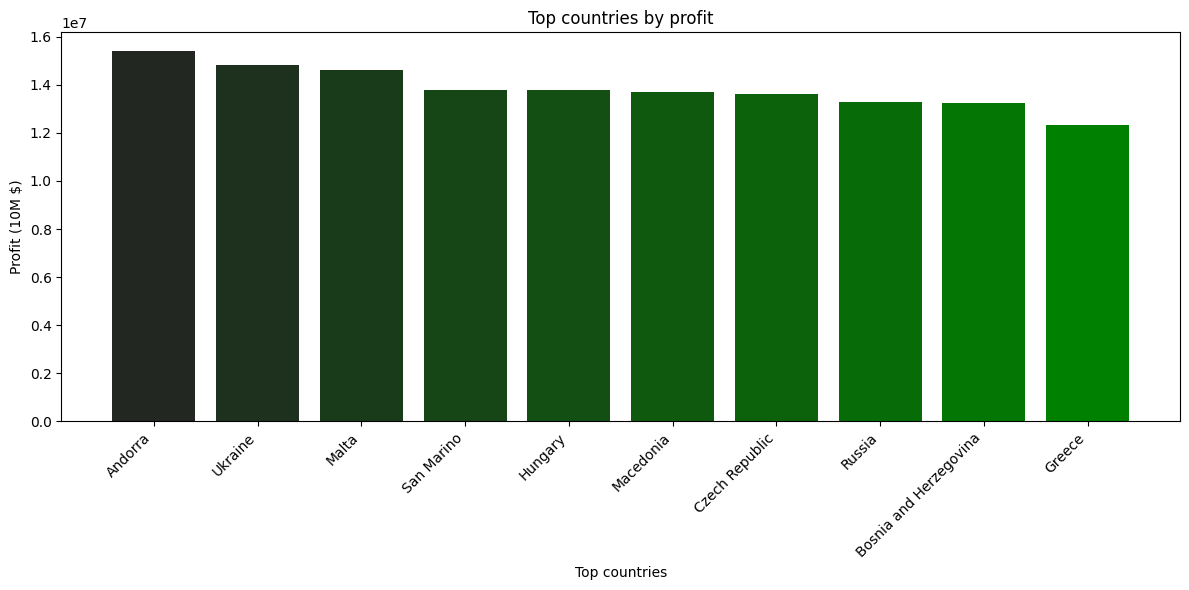

In [ ]:
# Define a color palette for the bars
colors = sns.color_palette('dark:green', len(top_countries_by_profit))

# Create bar graphs with different colors
plt.figure(figsize=(12, 6))
plt.bar(top_countries_by_profit.index, top_countries_by_profit.values, color=colors)
plt.xlabel("Top countries")
plt.ylabel("Profit (10M $)")
plt.title("Top countries by profit")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

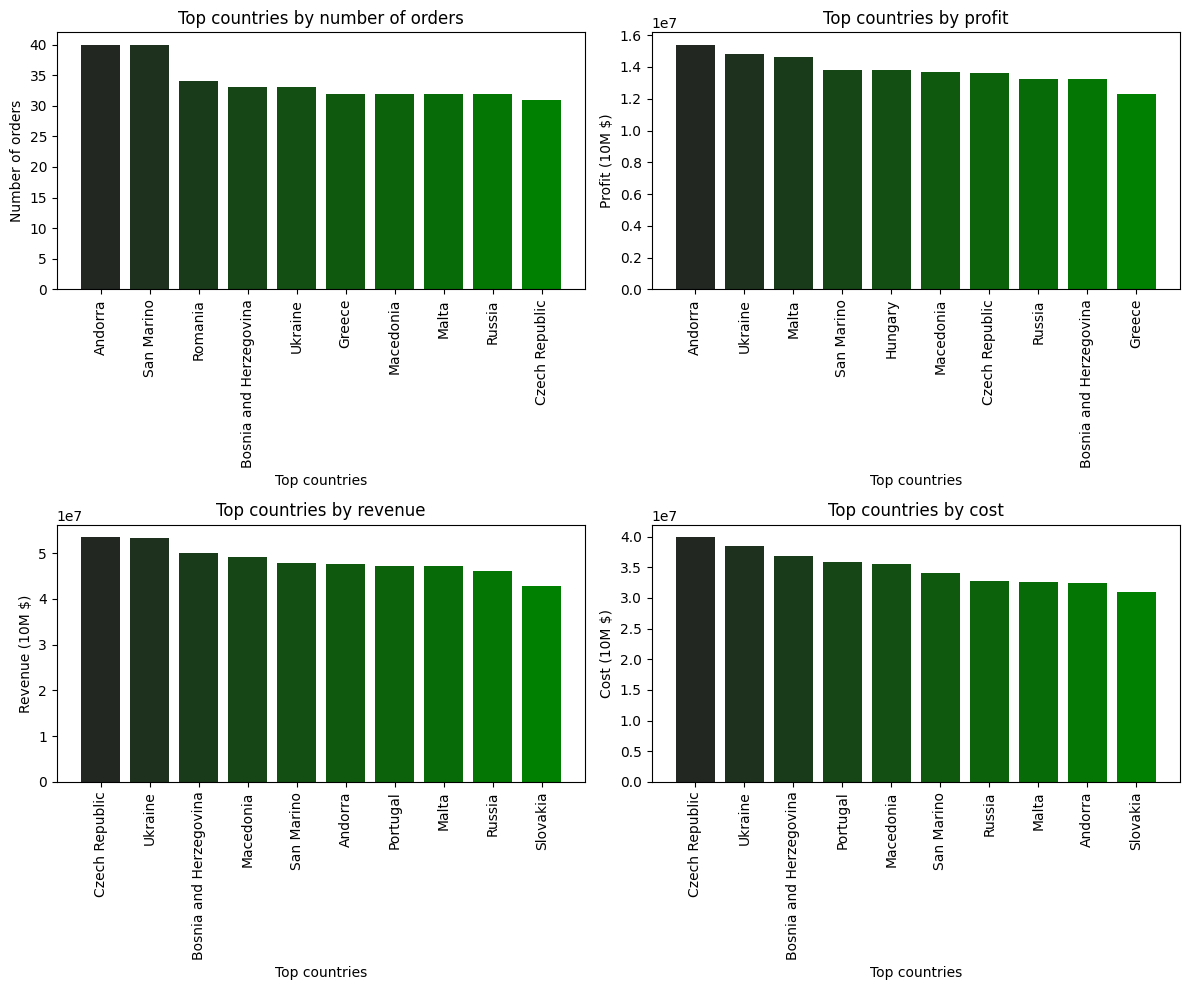

In [ ]:
# Create a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
top_countries_number_of_orders = data[data['Country'] != 'Unknown'].groupby("Country")['Order ID'].count().nlargest(10)
ax[0, 0].bar(top_countries_number_of_orders.index, top_countries_number_of_orders.values, color=colors)
ax[0, 0].set_title("Top countries by number of orders")  # Title of the subplot
ax[0, 0].set_xlabel("Top countries")  # X-axis label
ax[0, 0].set_ylabel("Number of orders")  # Y-axis label
ax[0, 0].tick_params(axis='x', rotation=90)


# Second subplot
ax[0, 1].bar(top_countries_by_profit.index, top_countries_by_profit.values, color=colors)
ax[0, 1].set_title("Top countries by profit")  # Title of the subplot
ax[0, 1].set_xlabel("Top countries")  # X-axis label
ax[0, 1].set_ylabel("Profit (10M $)")  # Y-axis label
ax[0, 1].tick_params(axis='x', rotation=90)

# Third subplot
top_countries_revenue = data[data['Country'] != 'Unknown'].groupby("Country")['Revenue'].sum().nlargest(10)
ax[1, 0].bar(top_countries_revenue.index, top_countries_revenue.values, color=colors)
ax[1, 0].set_title("Top countries by revenue")  # Title of the subplot
ax[1, 0].set_xlabel("Top countries")  # X-axis label
ax[1, 0].set_ylabel("Revenue (10M $)")  # Y-axis label
ax[1, 0].tick_params(axis='x', rotation=90)

# Fourth subplot
top_countries_cost = data[data['Country'] != 'Unknown'].groupby("Country")['Cost'].sum().nlargest(10)
ax[1, 1].bar(top_countries_cost.index, top_countries_cost.values, color=colors)
ax[1, 1].set_title("Top countries by cost")  # Title of the subplot
ax[1, 1].set_xlabel("Top countries")  # X-axis label
ax[1, 1].set_ylabel("Cost (10M $)")  # Y-axis label
ax[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [ ]:
top_countries_number_of_orders[:2]

,Order ID
Country,
Andorra,40
San Marino,40


In [ ]:
top_countries_by_profit

,Profit
Country,
Andorra,15410036.63
Ukraine,14804925.74
Malta,14610127.88
San Marino,13792992.81
Hungary,13786231.03
Macedonia,13684099.95
Czech Republic,13635593.78
Russia,13267682.64
Bosnia and Herzegovina,13257602.77


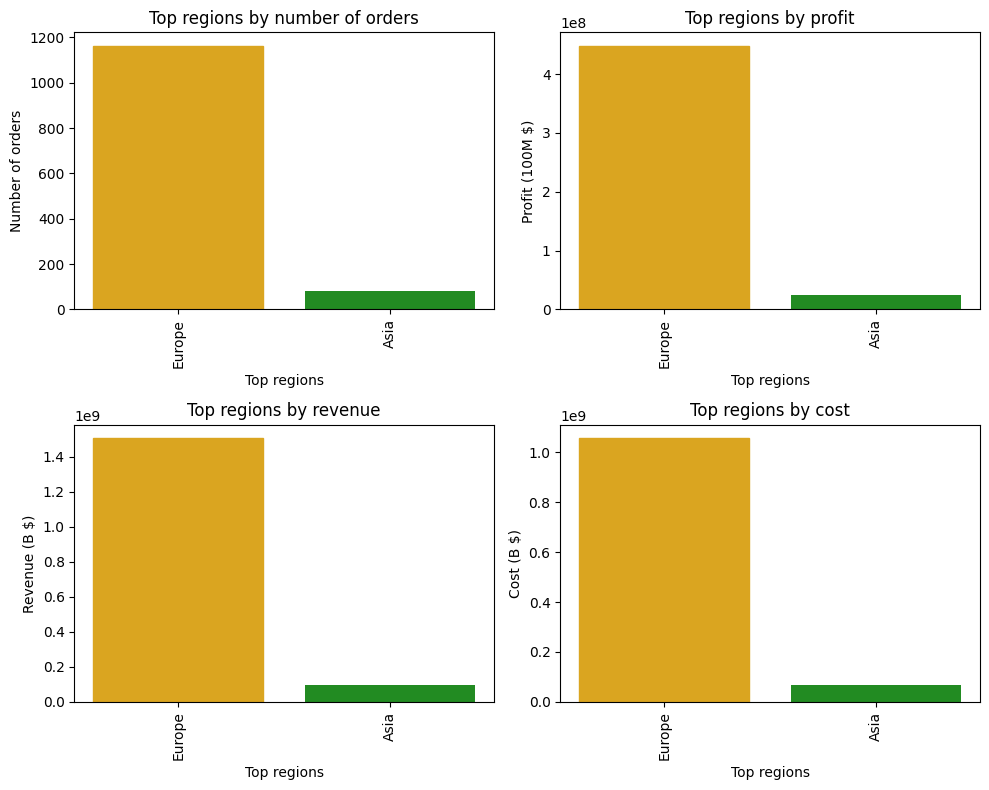

In [ ]:
# Create a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# First subplot
top_regions_number_of_orders = data[data['region'] != 'Unknown'].groupby("region")['Order ID'].count().sort_values(ascending=False)
bars = ax[0, 0].bar(top_regions_number_of_orders.index, top_regions_number_of_orders.values, color="forestgreen")
bars[0].set_color('goldenrod')
ax[0, 0].set_title("Top regions by number of orders")  # Title of the subplot
ax[0, 0].set_xlabel("Top regions")  # X-axis label
ax[0, 0].set_ylabel("Number of orders")  # Y-axis label
ax[0, 0].tick_params(axis='x', rotation=90)


# Second subplot
bars = ax[0, 1].bar(top_regions_by_profit.index, top_regions_by_profit.values, color="forestgreen")
bars[0].set_color('goldenrod')
ax[0, 1].set_title("Top regions by profit")  # Title of the subplot
ax[0, 1].set_xlabel("Top regions")  # X-axis label
ax[0, 1].set_ylabel("Profit (100M $)")  # Y-axis label
ax[0, 1].tick_params(axis='x', rotation=90)

# Third subplot
top_regions_revenue = data[data['region'] != 'Unknown'].groupby("region")['Revenue'].sum().sort_values(ascending=False)
bars = ax[1, 0].bar(top_regions_revenue.index, top_regions_revenue.values, color="forestgreen")
bars[0].set_color('goldenrod')
ax[1, 0].set_title("Top regions by revenue")  # Title of the subplot
ax[1, 0].set_xlabel("Top regions")  # X-axis label
ax[1, 0].set_ylabel("Revenue (B $)")  # Y-axis label
ax[1, 0].tick_params(axis='x', rotation=90)

# Fourth subplot
top_regions_cost = data[data['region'] != 'Unknown'].groupby("region")['Cost'].sum().sort_values(ascending=False)
bars = ax[1, 1].bar(top_regions_cost.index, top_regions_cost.values, color="forestgreen")
bars[0].set_color('goldenrod')
ax[1, 1].set_title("Top regions by cost")  # Title of the subplot
ax[1, 1].set_xlabel("Top regions")  # X-axis label
ax[1, 1].set_ylabel("Cost (B $)")  # Y-axis label
ax[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [ ]:
print(f"{top_regions_number_of_orders.index[-1]} region's share of total number of orders: {top_regions_number_of_orders.values[-1]/data[data['region'] != 'Unknown']['Order ID'].count() *100}%")
print(f"{top_regions_number_of_orders.index[0]} region's share of total number of orders: {top_regions_number_of_orders.values[0]/data[data['region'] != 'Unknown']['Order ID'].count() *100}%")

Asia region's share of total number of orders: 6.5810593900481535%
Europe region's share of total number of orders: 93.41894060995185%


In [ ]:
print(f"{top_regions_by_profit.index[-1]} region's share of total profit: {top_regions_by_profit.values[-1]/data[data['region'] != 'Unknown']['Profit'].sum() *100}%")
print(f"{top_regions_by_profit.index[0]} region's share of total profit: {top_regions_by_profit.values[0]/data[data['region'] != 'Unknown']['Profit'].sum() *100}%")

Asia region's share of total profit: 5.309641802971779%
Europe region's share of total profit: 94.69035819702822%


Порахуємо час доставки товарів.

In [ ]:
data['Delivery Days'] = data['Ship Date'] - data['Order Date']

In [ ]:
data['Delivery Days'] = data['Delivery Days'].dt.days

In [ ]:
data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Product Category,Country,alpha-2,region,sub-region,Revenue,Cost,Profit,Delivery Days
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe,133705.00,76121.50,57583.50,10
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe,409960.10,233400.23,176559.87,0
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown,Unknown,3136191.11,2358420.22,777770.89,24
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe,127966.88,41968.64,85998.24,31
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe,362897.60,243129.92,119767.68,38


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          1328 non-null   int64         
 1   Order Date        1328 non-null   datetime64[ns]
 2   Ship Date         1328 non-null   datetime64[ns]
 3   Order Priority    1328 non-null   object        
 4   Country Code      1328 non-null   object        
 5   Product ID        1328 non-null   int64         
 6   Sales Channel     1328 non-null   object        
 7   Units Sold        1328 non-null   float64       
 8   Unit Price        1328 non-null   float64       
 9   Unit Cost         1328 non-null   float64       
 10  Product Category  1328 non-null   object        
 11  Country           1328 non-null   object        
 12  alpha-2           1328 non-null   object        
 13  region            1328 non-null   object        
 14  sub-region        1328 n

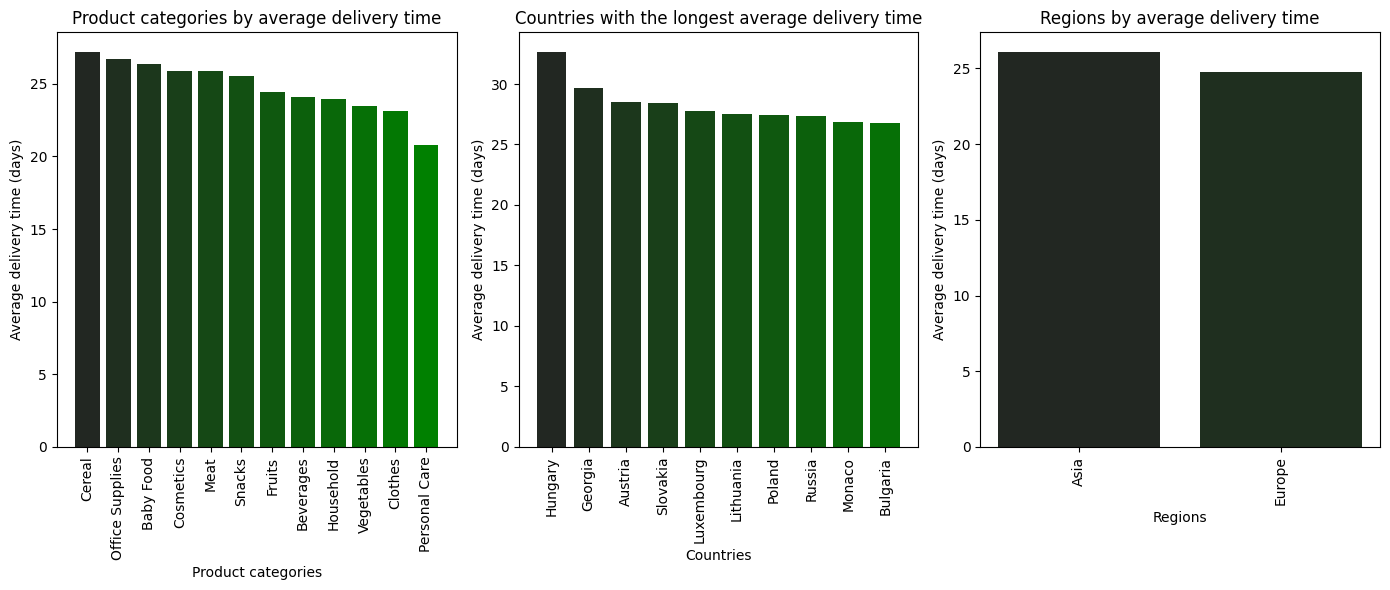

In [ ]:
colors = sns.color_palette('dark:green', data['Product Category'].nunique())
# Create a figure with 1 row and 3 columns of subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# First subplot - Bar plot
categories_delivery_days = data.groupby("Product Category")['Delivery Days'].mean().sort_values(ascending=False)
ax[0].bar(categories_delivery_days.index, categories_delivery_days.values, color=colors)
ax[0].set_title("Product categories by average delivery time")  # Title of the subplot
ax[0].set_xlabel("Product categories")  # X-axis label
ax[0].set_ylabel("Average delivery time (days)")  # Y-axis label
ax[0].tick_params(axis='x', rotation=90)

# Second subplot - Bar plot
top_countries_delivery_days = data[data['Country'] != 'Unknown'].groupby("Country")['Delivery Days'].mean().nlargest(10)
ax[1].bar(top_countries_delivery_days.index, top_countries_delivery_days.values, color=colors)
ax[1].set_title("Countries with the longest average delivery time")  # Title of the subplot
ax[1].set_xlabel("Countries")  # X-axis label
ax[1].set_ylabel("Average delivery time (days)")  # Y-axis label
ax[1].tick_params(axis='x', rotation=90)

# Third subplot - Bar plot
regions_delivery_days = data[data['Country'] != 'Unknown'].groupby("region")['Delivery Days'].mean().sort_values(ascending=False)
ax[2].bar(regions_delivery_days.index, regions_delivery_days.values, color=colors)
ax[2].set_title("Regions by average delivery time")  # Title of the subplot
ax[2].set_xlabel("Regions")  # X-axis label
ax[2].set_ylabel("Average delivery time (days)")  # Y-axis label
ax[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout() #забезпечує автоматичне регулювання розташування графіків, щоб уникнути накладень

# Show plots
plt.show()

In [ ]:
print(f"Average delivery time for category {categories_delivery_days.index[-1]}: {categories_delivery_days.values[-1]} days")
print(f"Average delivery time for category {categories_delivery_days.index[0]}: {categories_delivery_days.values[0]} days")
print(f"The longest average delivery time is for delivery to {top_countries_delivery_days.index[0]}: {top_countries_delivery_days.values[0]} days")
print(f"Difference between average delivery time by regions: {(regions_delivery_days.values[0] - regions_delivery_days.values[-1])} days")

Average delivery time for category Personal Care: 20.763157894736842 days
Average delivery time for category Cereal: 27.184466019417474 days
The longest average delivery time is for delivery to Hungary: 32.64 days
Difference between average delivery time by regions: 1.2949878467856841 days


Проаналізуємо взаємозв'язок між часом доставки та прибутком.

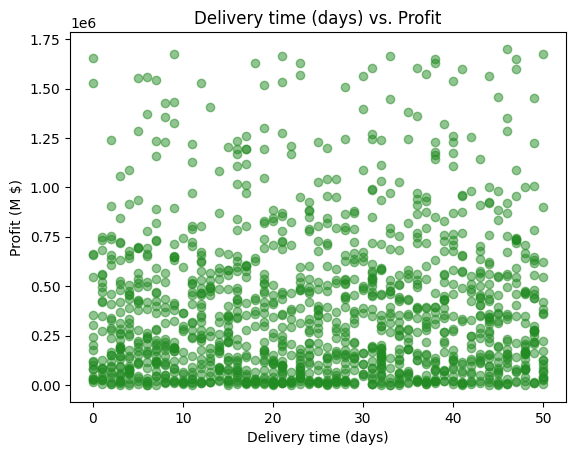

In [ ]:
plt.scatter(data['Delivery Days'], data['Profit'], color="forestgreen", alpha=0.5)
plt.title("Delivery time (days) vs. Profit")  # Title of the graph
plt.xlabel("Delivery time (days)")  # X-axis label
plt.ylabel("Profit (M $)")  # Y-axis label
plt.show()

Проаналізуємо динаміку прибутку.

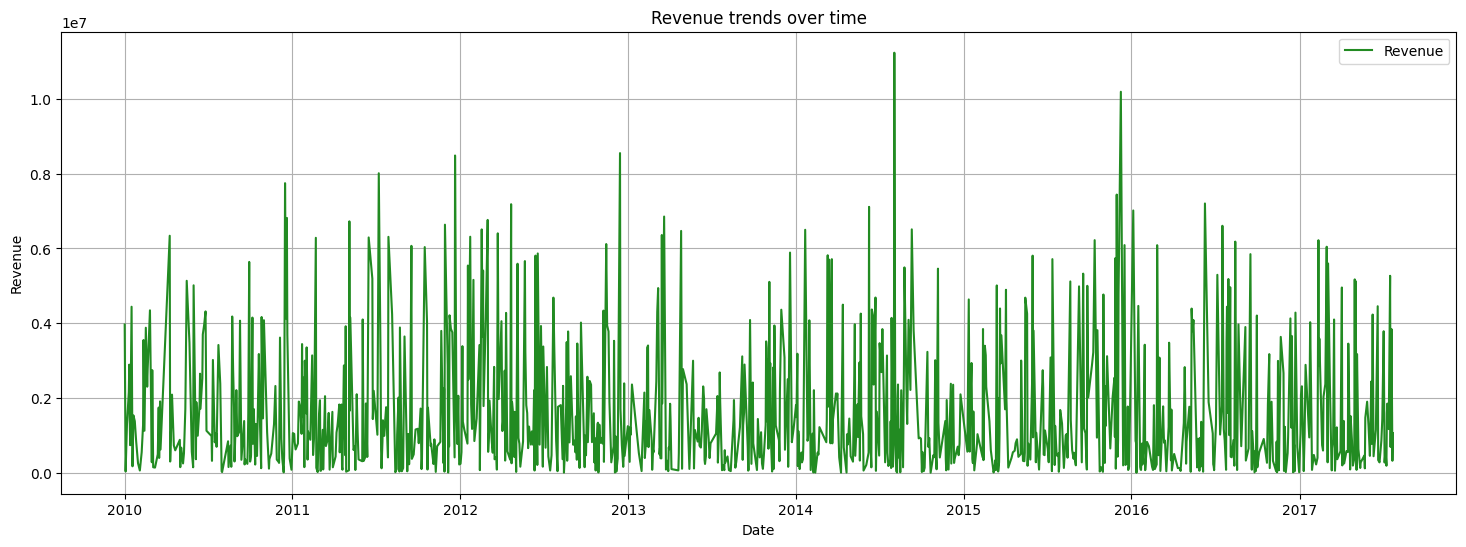

In [ ]:
revenue_over_time = data.groupby("Order Date")["Revenue"].sum()

plt.figure(figsize=(18, 6))
plt.plot(revenue_over_time.index, revenue_over_time.values, label="Revenue", color="forestgreen")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue trends over time")
plt.legend()
plt.grid(True)
plt.show()

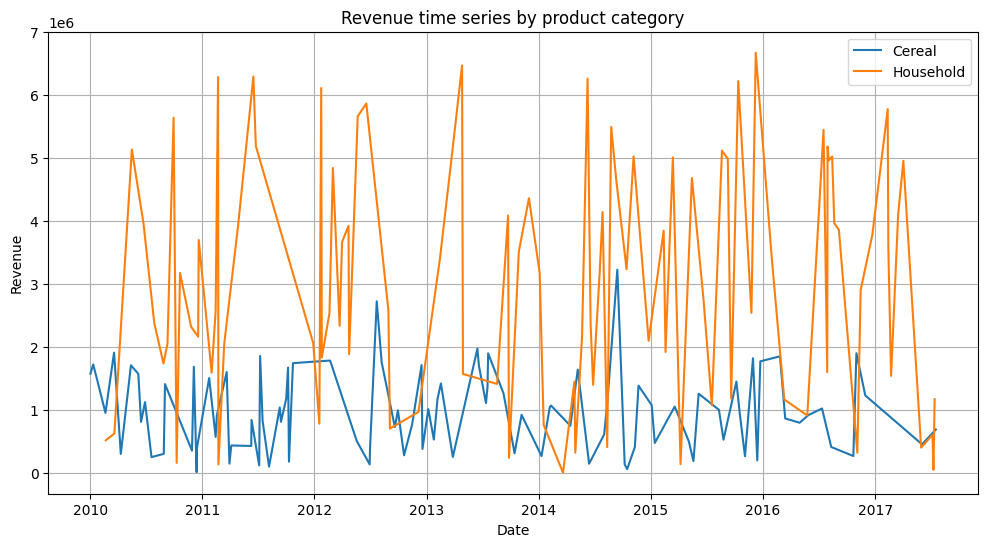

In [ ]:
product_categories = data['Product Category'].unique()[:2]
time_series_data_revenue = (
    data.groupby(["Product Category", "Order Date"])["Revenue"].sum().reset_index()
)
plt.figure(figsize=(12, 6))
for category in product_categories:
    category_data = time_series_data_revenue[time_series_data_revenue["Product Category"] == category]
    plt.plot(category_data["Order Date"], category_data["Revenue"], label=category)

plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue time series by product category")
plt.legend()
plt.grid(True)
plt.show()


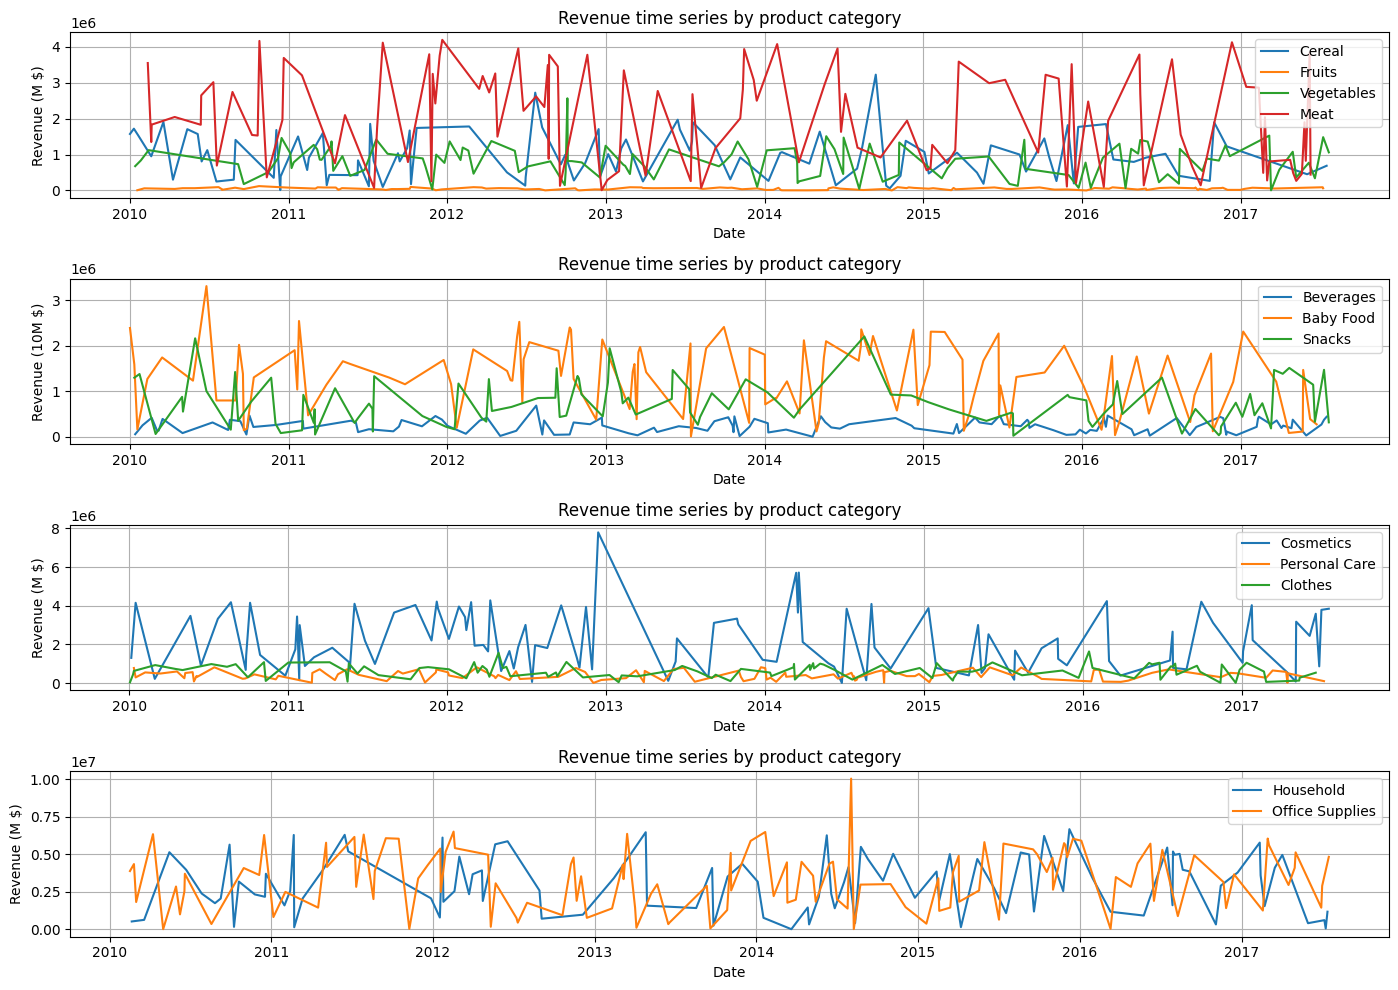

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(14, 10))

# First subplot
product_categories = ['Cereal', 'Fruits', 'Vegetables', 'Meat']
time_series_data_revenue = (
    data.groupby(["Product Category", "Order Date"])["Revenue"].sum().reset_index()
)
for category in product_categories:
    category_data = time_series_data_revenue[time_series_data_revenue["Product Category"] == category]
    ax[0].plot(category_data["Order Date"], category_data["Revenue"], label=category)
ax[0].set_title("Revenue time series by product category")  # Title of the subplot
ax[0].set_xlabel("Date")  # X-axis label
ax[0].set_ylabel("Revenue (M $)")  # Y-axis label
ax[0].legend()
ax[0].grid(True)

# Second subplot
product_categories = ['Beverages', 'Baby Food', 'Snacks']

for category in product_categories:
    category_data = time_series_data_revenue[time_series_data_revenue["Product Category"] == category]
    ax[1].plot(category_data["Order Date"], category_data["Revenue"], label=category)
ax[1].set_title("Revenue time series by product category")  # Title of the subplot
ax[1].set_xlabel("Date")  # X-axis label
ax[1].set_ylabel("Revenue (10M $)")  # Y-axis label
ax[1].legend()
ax[1].grid(True)

# Third subplot
product_categories = ['Cosmetics', 'Personal Care', 'Clothes']

for category in product_categories:
    category_data = time_series_data_revenue[time_series_data_revenue["Product Category"] == category]
    ax[2].plot(category_data["Order Date"], category_data["Revenue"], label=category)
ax[2].set_title("Revenue time series by product category")  # Title of the subplot
ax[2].set_xlabel("Date")  # X-axis label
ax[2].set_ylabel("Revenue (M $)")  # Y-axis label
ax[2].legend()
ax[2].grid(True)

# Forth subplot
product_categories = ['Household', 'Office Supplies']

for category in product_categories:
    category_data = time_series_data_revenue[time_series_data_revenue["Product Category"] == category]
    ax[3].plot(category_data["Order Date"], category_data["Revenue"], label=category)
ax[3].set_title("Revenue time series by product category")  # Title of the subplot
ax[3].set_xlabel("Date")  # X-axis label
ax[3].set_ylabel("Revenue (M $)")  # Y-axis label
ax[3].legend()
ax[3].grid(True)

# Adjust layout
plt.tight_layout() #забезпечує автоматичне регулювання розташування графіків, щоб уникнути накладень

# Show plots
plt.show()

Проаналізуємо динаміку доходу у 3 країнах з найвищим сумарним доходом.

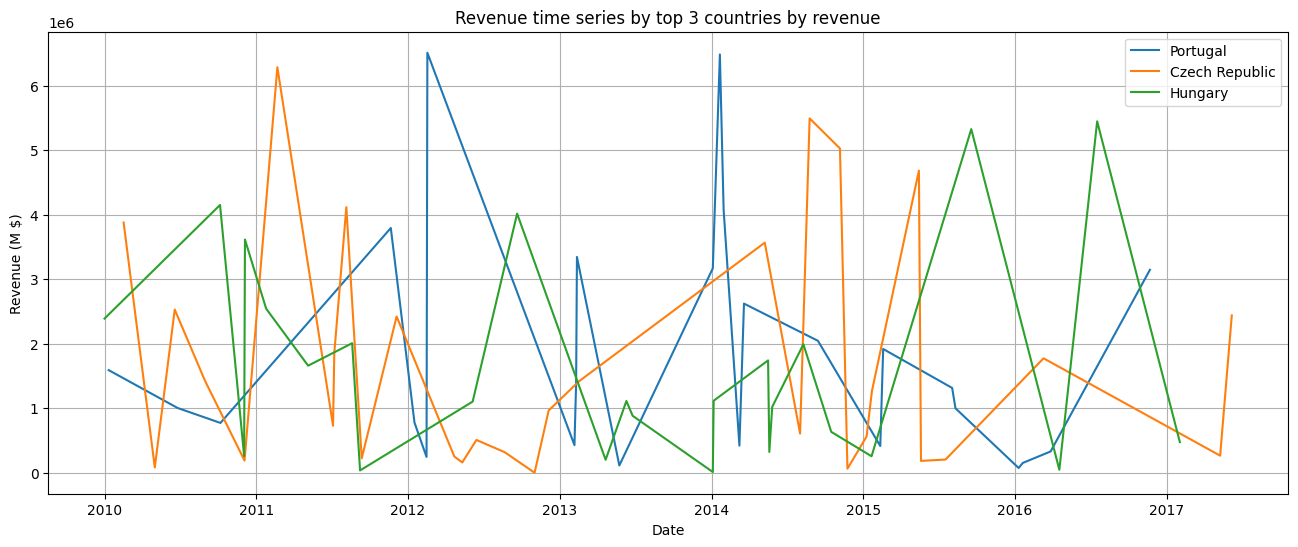

In [ ]:
top_countries_3 = data[data['Country'] != 'Unknown'].groupby("Country")['Revenue'].mean().nlargest(3).index
time_series_data_country_revenue = (
    data.groupby(["Country", "Order Date"])["Revenue"].sum().reset_index()
)
plt.figure(figsize=(16, 6))
for country in top_countries_3:
    country_data = time_series_data_country_revenue[time_series_data_country_revenue["Country"] == country]
    plt.plot(country_data["Order Date"], country_data["Revenue"], label=country)
plt.xlabel("Date")
plt.ylabel("Revenue (M $)")
plt.title("Revenue time series by top 3 countries by revenue")
plt.legend()
plt.grid(True)
plt.show()


Проаналізуємо динаміку прибутків за регіонами.

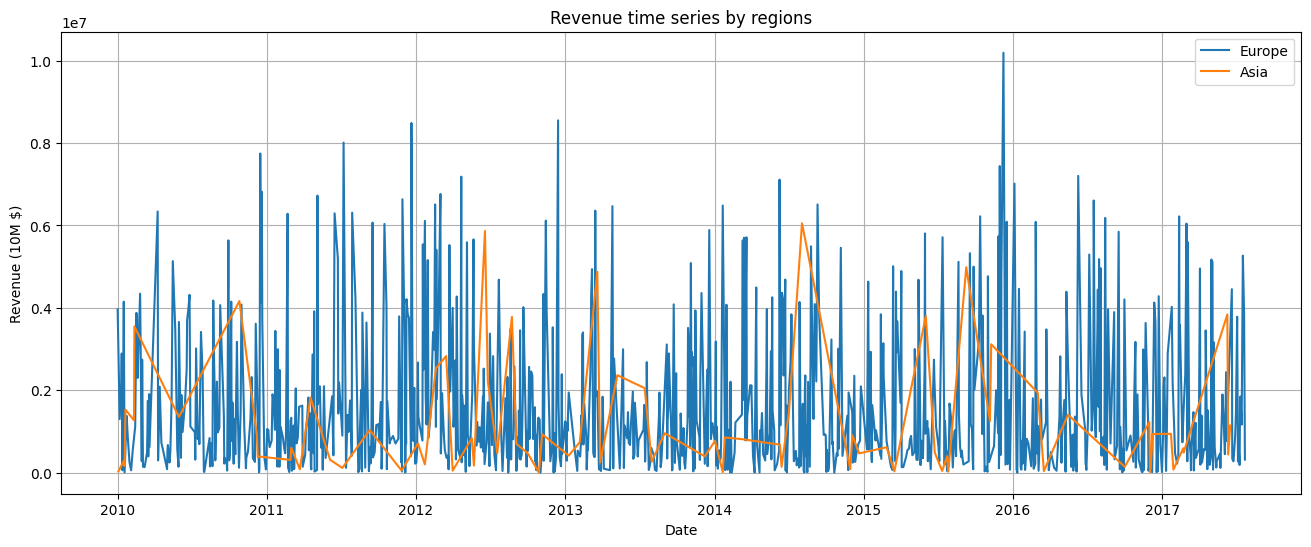

In [ ]:
regions = data[data['Country'] != 'Unknown']['region'].unique()
time_series_data_region_revenue = (
    data.groupby(["region", "Order Date"])["Revenue"].sum().reset_index()
)
plt.figure(figsize=(16, 6))
for region in regions:
    region_data = time_series_data_region_revenue[time_series_data_region_revenue["region"] == region]
    plt.plot(region_data["Order Date"], region_data["Revenue"], label=region)
plt.xlabel("Date")
plt.ylabel("Revenue (10M $)")
plt.title("Revenue time series by regions")
plt.legend()
plt.grid(True)
plt.show()

Проаналізуємо прибутки за днями тижня.

In [ ]:
data["Day of Week"] = data["Order Date"].dt.dayofweek  # Monday=0, Sunday=6
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          1328 non-null   int64         
 1   Order Date        1328 non-null   datetime64[ns]
 2   Ship Date         1328 non-null   datetime64[ns]
 3   Order Priority    1328 non-null   object        
 4   Country Code      1328 non-null   object        
 5   Product ID        1328 non-null   int64         
 6   Sales Channel     1328 non-null   object        
 7   Units Sold        1328 non-null   float64       
 8   Unit Price        1328 non-null   float64       
 9   Unit Cost         1328 non-null   float64       
 10  Product Category  1328 non-null   object        
 11  Country           1328 non-null   object        
 12  alpha-2           1328 non-null   object        
 13  region            1328 non-null   object        
 14  sub-region        1328 n

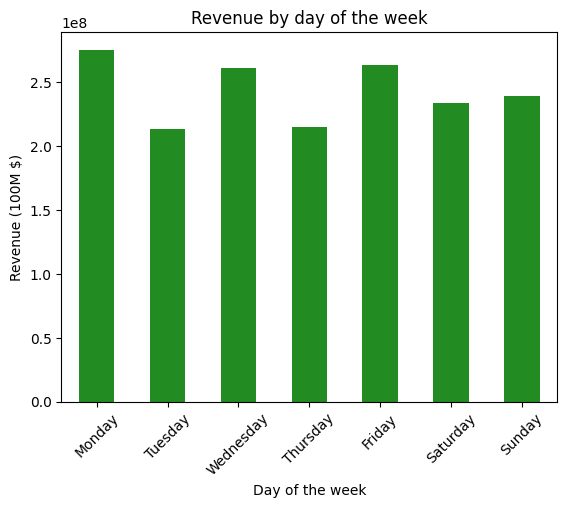

In [ ]:
day_of_week_revenue = data.groupby("Day of Week")["Revenue"].sum()
day_of_week_revenue.index = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
day_of_week_revenue.plot(
    kind="bar",
    xlabel="Day of the week",
    ylabel="Revenue (100M $)",
    title="Revenue by day of the week",
    color = "forestgreen"
)
plt.xticks(rotation=45)
plt.show()


In [ ]:
day_of_week_revenue

,Revenue
Monday,2.754685e+08
Tuesday,2.135239e+08
Wednesday,2.612157e+08
Thursday,2.149222e+08
Friday,2.638070e+08
Saturday,2.336411e+08
Sunday,2.395510e+08


Проаналізуємо динаміку прибутків за днями тижня у розрізі категорій.

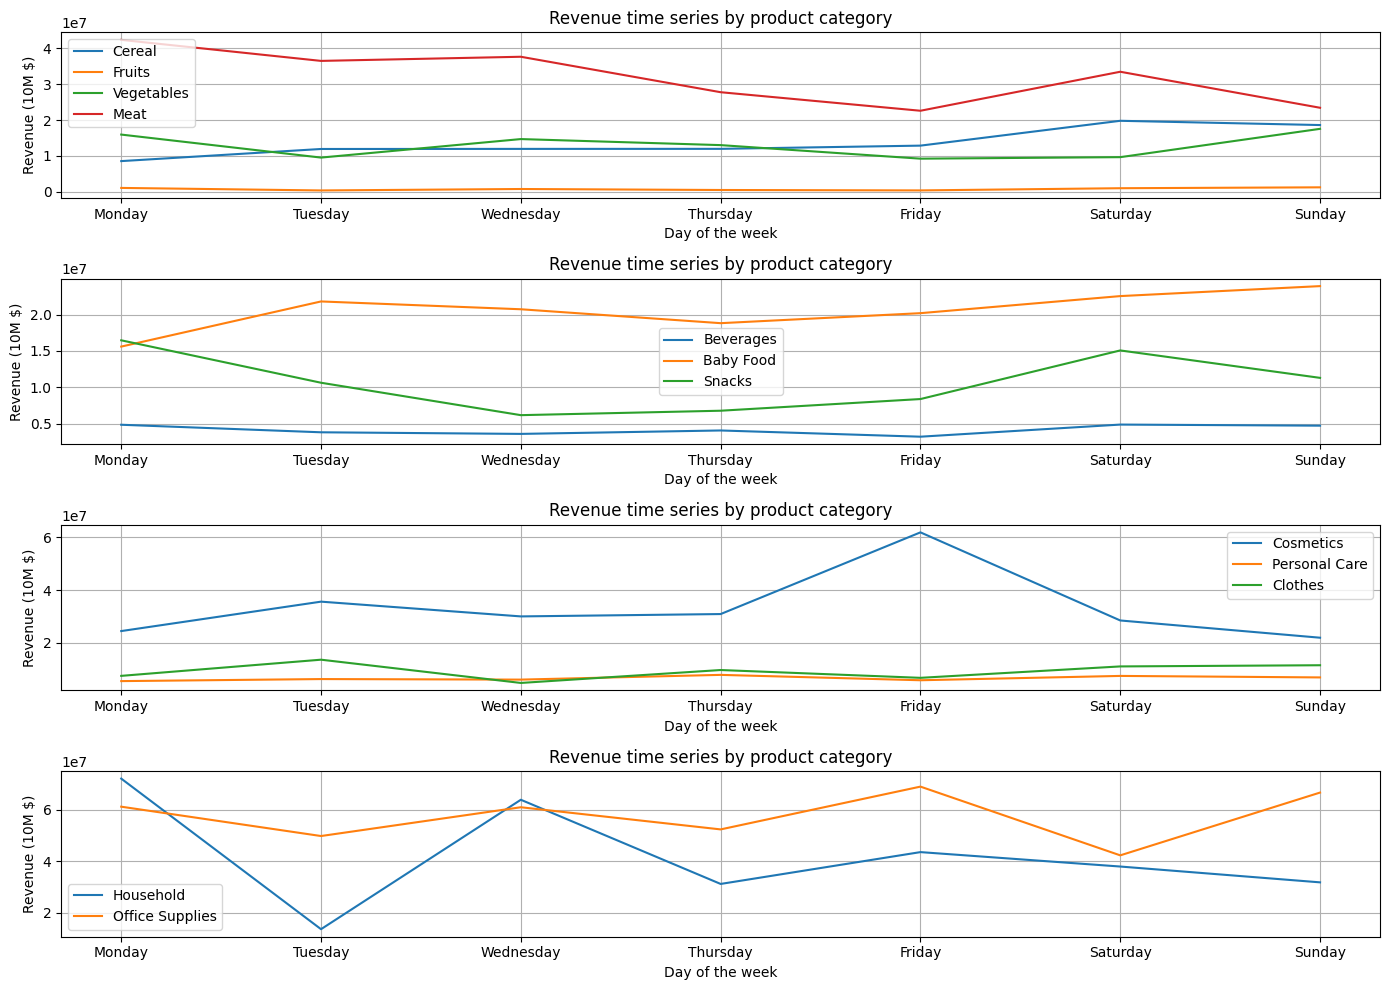

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(14, 10))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_unique_weekdays = sorted(data['Order Date'].dt.day_name().unique(), key=lambda x: weekday_order.index(x))

# First subplot
product_categories = ['Cereal', 'Fruits', 'Vegetables', 'Meat']
category_day_of_week_revenue = data.groupby(["Product Category", "Day of Week"])["Revenue"].sum().reset_index()

for category in product_categories:
    category_data = category_day_of_week_revenue[category_day_of_week_revenue["Product Category"] == category]
    ax[0].plot(sorted_unique_weekdays, category_data["Revenue"], label=category)
ax[0].set_title("Revenue time series by product category")  # Title of the subplot
ax[0].set_xlabel("Day of the week")  # X-axis label
ax[0].set_ylabel("Revenue (10M $)")  # Y-axis label
ax[0].legend()
ax[0].grid(True)

# Second subplot
product_categories = ['Beverages', 'Baby Food', 'Snacks']

for category in product_categories:
    category_data = category_day_of_week_revenue[category_day_of_week_revenue["Product Category"] == category]
    ax[1].plot(sorted_unique_weekdays, category_data["Revenue"], label=category)
ax[1].set_title("Revenue time series by product category")  # Title of the subplot
ax[1].set_xlabel("Day of the week")  # X-axis label
ax[1].set_ylabel("Revenue (10M $)")  # Y-axis label
ax[1].legend()
ax[1].grid(True)

# Third subplot
product_categories = ['Cosmetics', 'Personal Care', 'Clothes']
for category in product_categories:
    category_data = category_day_of_week_revenue[category_day_of_week_revenue["Product Category"] == category]
    ax[2].plot(sorted_unique_weekdays, category_data["Revenue"], label=category)
ax[2].set_title("Revenue time series by product category")  # Title of the subplot
ax[2].set_xlabel("Day of the week")  # X-axis label
ax[2].set_ylabel("Revenue (10M $)")  # Y-axis label
ax[2].legend()
ax[2].grid(True)

# Forth subplot
product_categories = ['Household', 'Office Supplies']
for category in product_categories:
    category_data = category_day_of_week_revenue[category_day_of_week_revenue["Product Category"] == category]
    ax[3].plot(sorted_unique_weekdays, category_data["Revenue"], label=category)
ax[3].set_title("Revenue time series by product category")  # Title of the subplot
ax[3].set_xlabel("Day of the week")  # X-axis label
ax[3].set_ylabel("Revenue (10M $)")  # Y-axis label
ax[3].legend()
ax[3].grid(True)

# Adjust layout
plt.tight_layout() #забезпечує автоматичне регулювання розташування графіків, щоб уникнути накладень

# Show plots
plt.show()

Загальна кількість замовлень: 1328.

Загальний прибуток: 1702129408.21 \$.

Загальні витрати: 1200694949.21 \$.

Загальний дохід: 501434459.0 \$.

Кількість охоплених країн: 45.

Найпопулярнішою категорією товарів за кількістю замовлень є Office Supplies (9%), а найменш популярною - Household (7%).
Найбільший дохід приносить категорія з найбільшою собівартістю - Office Supplies. Проте найбільший прибуток компанія отримує завдяки Cosmetics (18%). Категорія Fruits хоча й має найнижчу собівартість, але через найнижчий дохід має і найнижчий прибуток.

Отже, рекомендовано підвищити увагу до товарів з категорії Office Supplies та Cosmetics (за потреби збільшити запаси на складі). Зменшити обсяги або зовсім не закупляти товари з категорії Fruits.


За кількістю замовлень канали продажу практично рівні (різниця становить 2 замовлення на користь офлайн-каналу). Дохід та витрати значно більші у офлайн каналу (на 41 млн \$ та 36 млн \$ відповідно), але прибутки не настільки істотно відрізняються від онлайн каналу (різниця - 5 млн $).

Отже, можна однаково активно розвивати обидва канали продажу.

Найбільше замовлень надходить з Південної Європи, а саме з Андорри та Сан-Маріно (по 40 замовлень). Найбільший прибуток компанії приносять замовлення з Андорри (15,41 млн $).

Отже, потрібно або провести рекламну кампанію у країнах центральної та східної Європи, або збільшувати кількість торгових точок у південній Європі відповідно до цілей та можливостей компанії.

Оскільки за кількістю замовлень Європа значно випереджає Азію (93% проти 7%), то й прибуток від замовлень з цього регіону значно більший (95% проти 5%).

Отже, залежно від цілей компанії потрібно або покращити рекламну кампанію у країнах Азії, або сконцентруватися на клієнтах з Європи.

Найдовший середній час доставки товарів у категорії Cereal (27 днів). Найкоротший час доставки у категорії Personal Care (21 день). У розрізі країн в середньому найдовше дотавляють товари до Угорщини - 33 дні. Щодо регіонів, то середній час доставки товарів до Азії всього на 1 день довший ніж до Європи.  

Прибуток не залежить від часу доставки товару.

Можемо бачити, що до 2014 року спостерігалася певна сезонність: на початку року прибуток падав, протягом року були коливання, а в кінці року прибуток значно зростав. Проте з 2014 року така сезонність не спостерігається.

Сезонність прибутків у розрізі категорій не спостерігається.

У прибутків від продажів у Чехії сезонність не спостерігається. Прибутки від замовлень з Угорщини у кінці року спадають. Прибутки від замовлень з Португалії на початку року завжди зростають.

Спостерігаємо помісячну сезонність прибутків за регіонами.

Прибутки у понеділок (2,75 млн \$), середу (2,61 млн \$) та п'ятницю (2,64 млн \$) найвищі, а у вівторок (2,14 млн \$) та четвер (2,15 млн\$) - найнижчі.

Прибутки від категорій Cereal, Clothes, Beverages, Fruits, Baby Food, Snacks, Personal Care не мають значних коливань протягом тижня.